# Problema 1

##### a) Scrieti o functie care estimeaza prin simulari repetate probabilitatea ca intr-un grup de N persoane cel putin doua sa aiba aceeasi zi de nastere

     range(a,b+1) = generare lista cu elemente de la a la b
     random.choices(range(a,b+1),N) = lista cu N elemente din range

##### b) Probabilitatea ca intr-un grup de N persoane cel putin 2 sa aiba aceeasi zi de nastere

##### c) Reprezentati grafic functiile n = 2..50

    matplotlib.pyplot import plot, grid, title, show

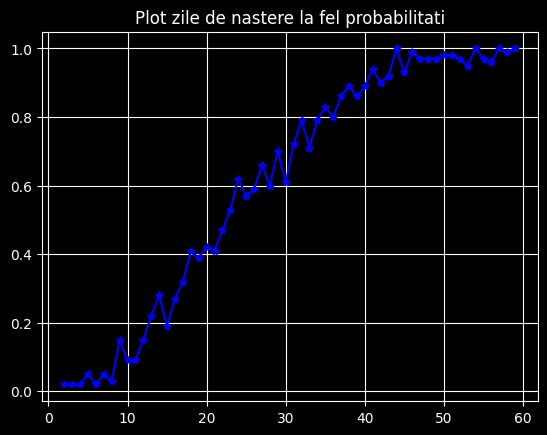

In [17]:
import math
from random import choices
from matplotlib.pyplot import plot,grid, title, show
SIMULATIONS = 100
def get_prob(nr_persoane):
    duplicate = 0
    for _ in range(SIMULATIONS):
        dates = choices(range(1,365), k=nr_persoane)
        if nr_persoane != len(set(dates)):
            duplicate += 1
    return duplicate/SIMULATIONS

title('Plot zile de nastere la fel probabilitati')
x_axys = range(2,60)
y_axys = [get_prob(nr_persoane) for nr_persoane in x_axys]
plot(x_axys, y_axys, 'b*-')
grid()
show()


# Problema 2

##### a) Generati N = 500, 1000, 5000 puncte uniforme aleatoare intr-un patrat. Afisati frecventa relativa a punctelor

###### i) sunt in interiorul cercului tangent laturilor patratului
###### ii) mai aproape de cnetrul patratului decat de varfurile patratului
###### iii) formeaza cu varfurile patratului 2 triunghiuri ascutit unghice

##### b) reprezentati grafic patratul si punctele pentru fiecare caz

##### c) Comparati freceventele relative obtinute cu propabilitatile geometrice corespunzatoare

Probabilitate geometrica pt i: 0.7853981633974483
Probabilitate geometrica pt ii: 0.5
Probabilitate geometrica pt iii: 0.5707963267948966


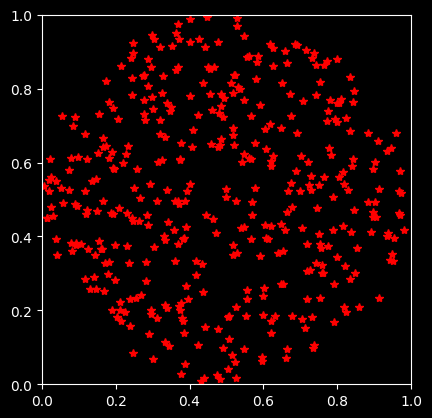

Frecventa relative i pt 500: 0.812


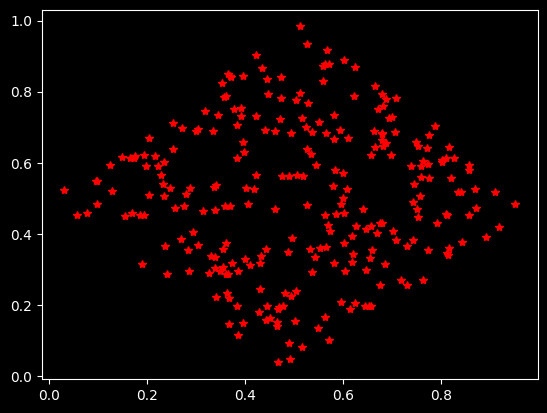

Frecventa relative ii pt 500: 0.532


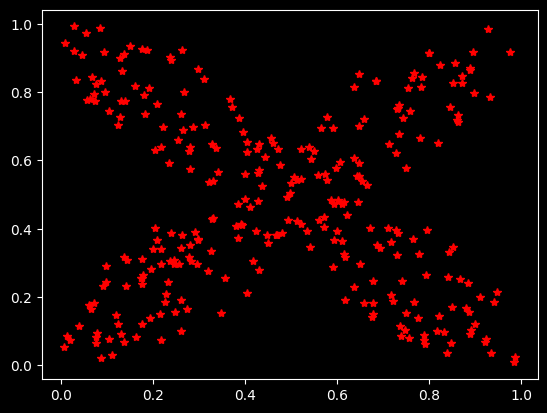

Frecventa relative iii pt 500: 0.594


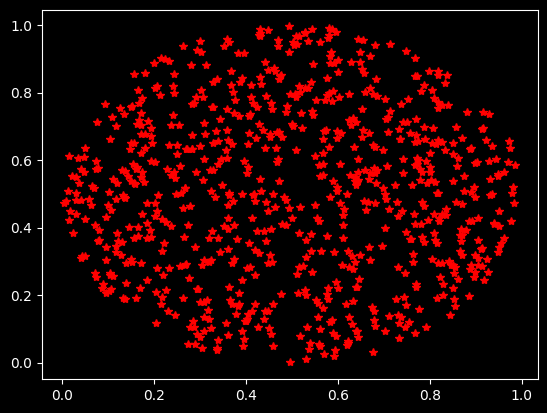

Frecventa relative i pt 1000: 0.771


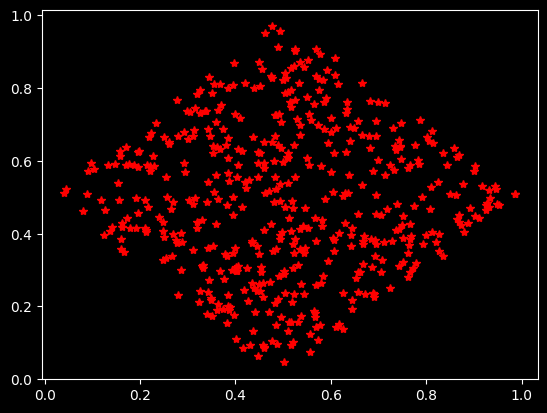

Frecventa relative ii pt 1000: 0.493


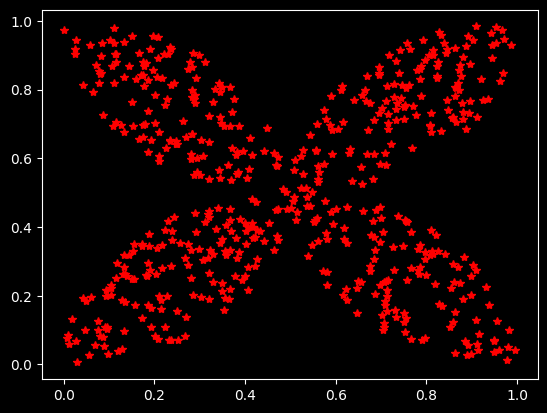

Frecventa relative iii pt 1000: 0.56


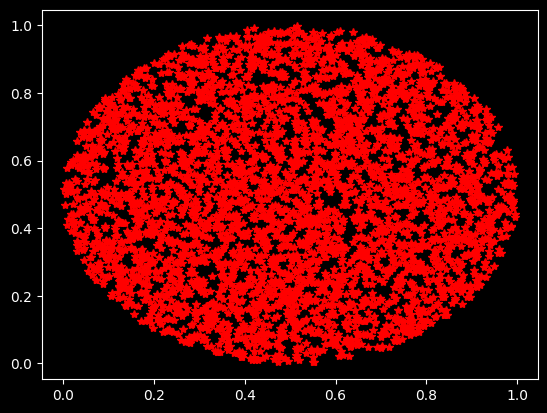

Frecventa relative i pt 5000: 0.7758


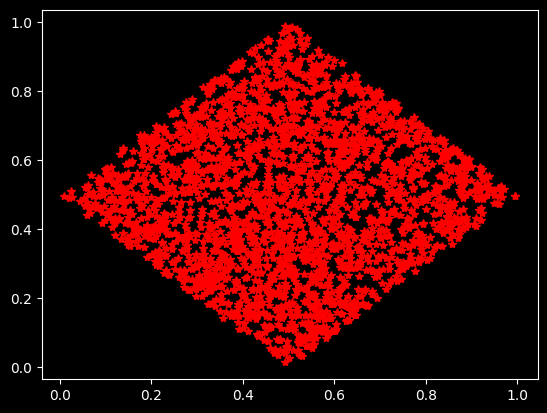

Frecventa relative ii pt 5000: 0.5014


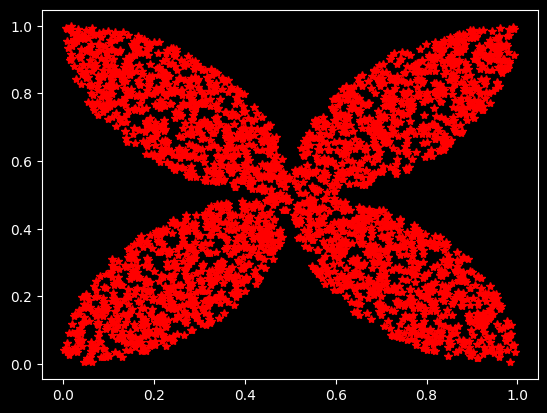

Frecventa relative iii pt 5000: 0.5718


In [38]:
from random import random
from matplotlib.pyplot import axis
from math import pow, dist, pi
N = [500, 1000, 5000]
A,B,C,D = (0,0),(1,0),(1,1),(0,1)
CENTER = (0.5,0.5)
axis('square')
axis((0,1,0,1))

def inside_circle(pointx, pointy):
    return pow(pointx-CENTER[0], 2) + pow(pointy-CENTER[1], 2) < pow(CENTER[0], 2)

def closer_to_center(pointx, pointy):
    current_point = (pointx, pointy)
    center_dist = dist(current_point, CENTER)
    A_dist = dist(current_point, A)
    B_dist = dist(current_point, B)
    C_dist = dist(current_point, C)
    D_dist = dist(current_point, D)
    return center_dist < A_dist and center_dist < C_dist  and center_dist < B_dist and center_dist < D_dist

def iii(pointx, pointy):
    P = (pointx, pointy)
    def tip_triunghi(P, V1, V2):
        v1x, v1y = V1[0] - P[0], V1[1] - P[1]
        v2x, v2y = V2[0] - P[0], V2[1] - P[1]

        dot_product = v1x * v2x + v1y * v2y

        if dot_product > 0:
            return "ascutit"
        elif dot_product < 0:
            return "obtuz"
        else:
            return "drept"

    rezultate = []
    rezultate.append(tip_triunghi(P, A, B)) # Triunghiul PAB
    rezultate.append(tip_triunghi(P, B, C)) # Triunghiul PBC
    rezultate.append(tip_triunghi(P, C, D)) # Triunghiul PCD
    rezultate.append(tip_triunghi(P, D, A)) # Triunghiul PDA

    ascutite = rezultate.count("ascutit")
    obtuze = rezultate.count("obtuz")

    return ascutite == 2 and obtuze == 2

def relative_freq(nr_sims, check_function):
    inside = 0
    puncte = [[],[]]
    for _ in range(nr_sims):
        point_x = random()
        point_y = random()
        if check_function(point_x, point_y):
            inside += 1
            puncte[0].append(point_x)
            puncte[1].append(point_y)
    desenare_puncte(puncte)
    return inside / nr_sims

def desenare_puncte(puncte):
    plot(puncte[0], puncte[1], 'r*')
    show()


prob_geo_i = pi*pow(CENTER[1],2)
prob_geo_ii = 1/2

arie_semicerc = prob_geo_i/2
arie_petala = (4*arie_semicerc - 1) / 4

prob_geo_iii = 4*arie_petala
print(f"Probabilitate geometrica pt i: {prob_geo_i}")
print(f"Probabilitate geometrica pt ii: {prob_geo_ii}")
print(f"Probabilitate geometrica pt iii: {prob_geo_iii}")


for nr_sims in N:
    print(f"Frecventa relative i pt {nr_sims}: {relative_freq(nr_sims, inside_circle)}")
    print(f"Frecventa relative ii pt {nr_sims}: {relative_freq(nr_sims, closer_to_center)}")
    print(f"Frecventa relative iii pt {nr_sims}: {relative_freq(nr_sims, iii)}")



